In [31]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
ls 'drive/My Drive/Colab Notebooks'

 1.jpg   3.jpg            'ImageProc_Lab5 (1).ipynb'   Untitled0.ipynb
 2.jpg   chess_board.png   ImageProc_Lab5.ipynb


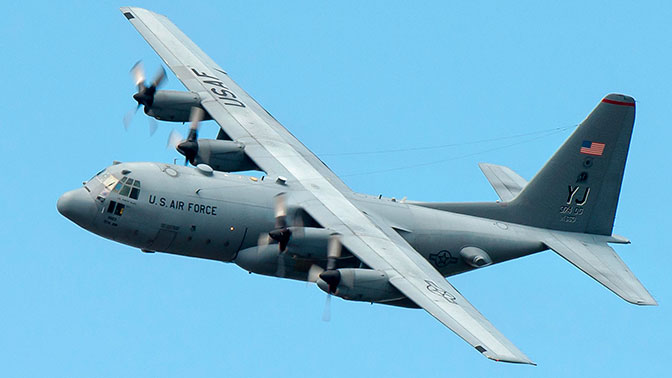

In [33]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("./drive/My Drive/Colab Notebooks/1.jpg")
cv2_imshow(image)

In [0]:
#rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2_imshow(rgb_image)

Threshold: 75
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 162
Total Keypoints without nonmaxSuppression: 162


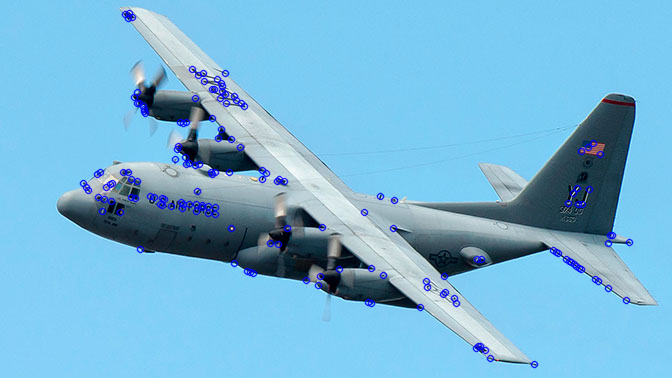

In [35]:
# Реализация Fast метода
fast = cv2.FastFeatureDetector_create(75)

# find and draw the keypoints
kp = fast.detect(image,None)
img2 = cv2.drawKeypoints(image, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv2.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(100)
kp = fast.detect(image,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img3 = cv2.drawKeypoints(image, kp, None, color=(255,0,0))

cv2.imwrite('fast_false.png',img3)
cv2_imshow(img3)

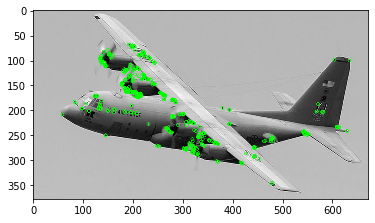

(<matplotlib.image.AxesImage at 0x7f75d9e2ddd8>, None)

In [36]:
#Реализация SIFT
#gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#sift = cv2.xfeatures2d.SIFT_create(75)
#kp = sift.detect(gray,None)

#img=cv2.drawKeypoints(gray,kp,image)

#cv2.imwrite('sift_keypoints.jpg',img)


#Реализация ORB (analog SIFT)
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./drive/My Drive/Colab Notebooks/1.jpg', 0)
orb = cv.ORB_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()


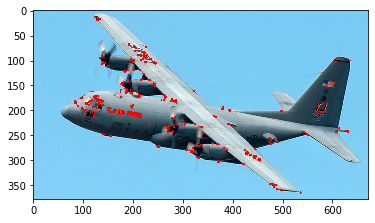

In [37]:
## Реализация кода Определялки углов Харриса
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./drive/My Drive/Colab Notebooks/1.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

img[dst > 0.01*dst.max()] = [0, 0, 255]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.show()



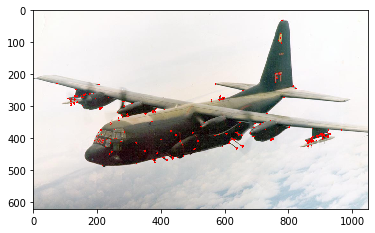

In [38]:
img2 = cv2.imread("./drive/My Drive/Colab Notebooks/2.jpg")

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2, 2, 3, 0.04)

dst2 = cv2.dilate(dst2, None)

img2[dst2 > 0.01*dst2.max()] = [0, 0, 255]
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img2)
plt.show()

In [52]:
img = cv2.imread("./drive/My Drive/Colab Notebooks/2.jpg")
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

32
(212, 32)


In [60]:
img2 = cv2.imread("./drive/My Drive/Colab Notebooks/1.jpg")
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp2 = star.detect(img2,None)
# compute the descriptors with BRIEF
kp2, des2 = brief.compute(img2, kp2)
print( brief.descriptorSize() )
print( des.shape )

32
(212, 32)


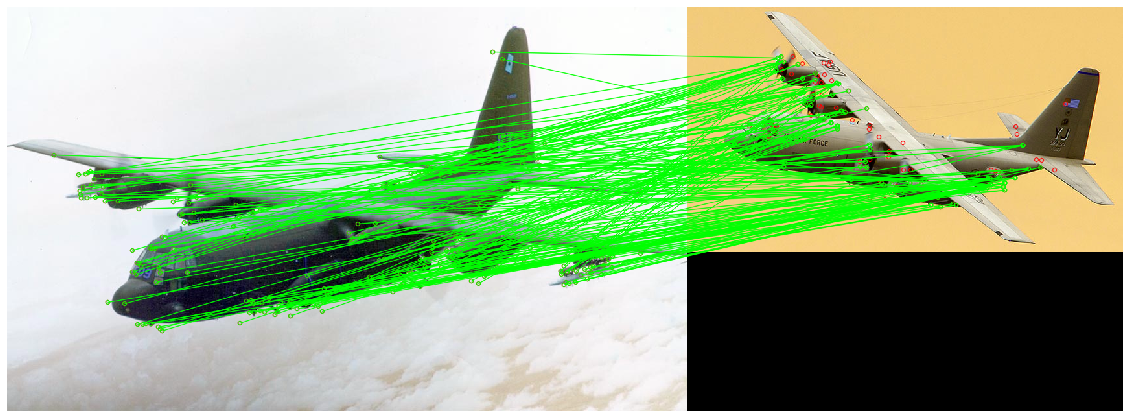

In [61]:
img2 = cv2.imread("./drive/My Drive/Colab Notebooks/1.jpg")
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
matches = bf.match(des,des2)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(cv2.drawMatches(img, kp, img2, kp2, matches, 0, flags=0, matchColor=(0, 255, 0), singlePointColor=(255, 0, 0)).astype(np.uint8))
plt.show()